# Imports

In [5]:
%load_ext autoreload
%autoreload 2

import datetime

import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

import matplotlib.pyplot as plt


from dataloader.load_regression_data_from_arbitrary_gp import RegressionDataGeneratorArbitraryGP, draw_single_example_from_arbitrary_gp

from model import ConditionalNeuralProcess
from utils.load_model import load_lnp_model

from utils.plot import plot_learning_curve
from utils.gaussian_processes.gp_model import plot_mean_with_std
from utils.gaussian_processes.plot_gp_utils import plot_preds_from_ds_test, plot_preds_from_single_example

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DataGenerator

In [101]:
from typing import Optional

def plot_first_elt_of_batch(context_x, context_y, target_x, target_y,
                            ax: Optional[plt.Axes]=None,
                            figsize=(8, 5)):
        """Plot the first element of a batch."""
        
        if ax is None:
            fig, ax = plt.subplots(figsize=figsize)
        
        context_x = context_x.numpy()
        context_y = context_y.numpy()
        target_x = target_x.numpy()
        target_y = target_y.numpy()
        
        ax.scatter(target_x[0, :, 0], target_y[0, :, 0], c="darkorange", label='Target')
        ax.scatter(context_x[0, :, 0], context_y[0, :, 0], marker="x", c="black", label='Observations')
        ax.legend()

        return ax

In [102]:
KERNEL_LENGTH_SCALE = 0.4

data_generator = RegressionDataGeneratorArbitraryGP(
    iterations=25,
    batch_size=32,
    min_num_context=3,
    max_num_context=7,
    min_num_target=100,
    max_num_target=101,
    min_x_val_uniform=-2,
    max_x_val_uniform=2,
    kernel_length_scale=KERNEL_LENGTH_SCALE
)

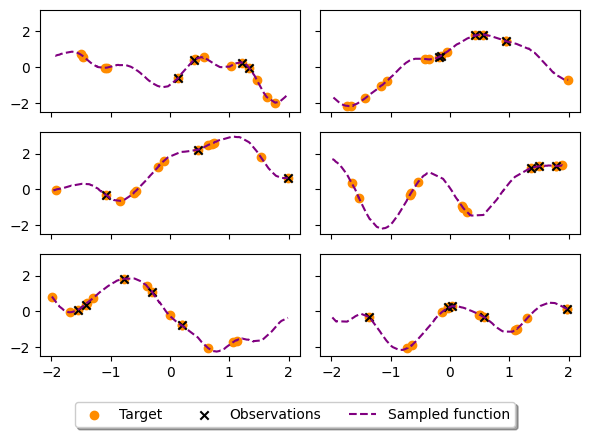

In [115]:
n_plots = 6
min_num_target=10
max_num_target=20

num_target = tf.random.uniform(shape=[],
                               minval=min_num_target,
                               maxval=max_num_target,
                               dtype=tf.int32)

fig, axis = plt.subplots(np.ceil(n_plots/2).astype(int), 2,
                         figsize=(2*np.ceil(n_plots/2), 2*2),
                         sharex=True,
                         sharey=True)

for idx, ax in enumerate(axis.flatten()):
    (context_x, context_y, target_x), target_y = next(iter(data_generator.train_ds))
    
    plot_first_elt_of_batch(context_x,
                            context_y,
                            tf.concat(
                                [context_x, target_x[:, :num_target, :]],
                                axis=1
                            ),
                            tf.concat(
                                [context_y, target_y[:, :num_target, :]],
                                axis=1
                            ),
                            ax)
    
    target_x = target_x[0]
    target_y = target_y[0]

    idx_x_sorted = tf.argsort(target_x, axis=0)
    
    target_x = tf.gather(target_x, idx_x_sorted).numpy().flatten()
    target_y = tf.gather(target_y, idx_x_sorted).numpy().flatten()
    
    ax.plot(target_x, target_y, color="purple", linestyle="--", label="Sampled function")
    ax.legend()

handles, labels = axis.flatten()[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.),
          fancybox=True, shadow=True, ncol=5)
    
for ax in axis.flatten():
    ax.get_legend().remove()

fig.tight_layout()

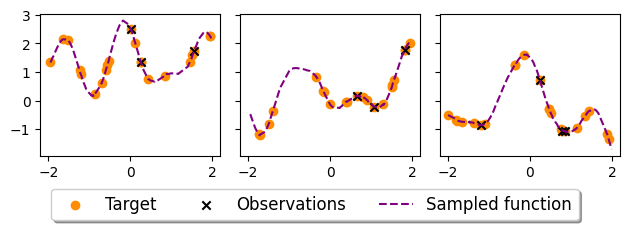

In [128]:
n_plots = 3
min_num_target=10
max_num_target=20

num_target = tf.random.uniform(shape=[],
                               minval=min_num_target,
                               maxval=max_num_target,
                               dtype=tf.int32)

fig, axis = plt.subplots(np.ceil(n_plots/3).astype(int), 3,
                         figsize=(3.2*2, 2),
                         sharex=True,
                         sharey=True)

for idx, ax in enumerate(axis.flatten()):
    (context_x, context_y, target_x), target_y = next(iter(data_generator.train_ds))
    
    plot_first_elt_of_batch(context_x,
                            context_y,
                            tf.concat(
                                [context_x, target_x[:, :num_target, :]],
                                axis=1
                            ),
                            tf.concat(
                                [context_y, target_y[:, :num_target, :]],
                                axis=1
                            ),
                            ax)
    
    target_x = target_x[0]
    target_y = target_y[0]

    idx_x_sorted = tf.argsort(target_x, axis=0)
    
    target_x = tf.gather(target_x, idx_x_sorted).numpy().flatten()
    target_y = tf.gather(target_y, idx_x_sorted).numpy().flatten()
    
    ax.plot(target_x, target_y, color="purple", linestyle="--", label="Sampled function")
    ax.legend()

handles, labels = axis.flatten()[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',
           fontsize=12,
           bbox_to_anchor=(0.5, 0.07),
          fancybox=True, shadow=True, ncol=5)
    
for ax in axis.flatten():
    ax.get_legend().remove()

fig.tight_layout()